# Binary Search Trees, Traversals and Balancing in Python

### Part 2 of "Data Structures and Algorithms in Python"

![](https://i.imgur.com/lVqP63n.png)





[Data Structures and Algorithms in Python](https://pythondsa.com) is beginner-friendly introduction to common data structures (linked lists, stacks, queues, graphs) and algorithms (search, sorting, recursion, dynamic programming) in Python, designed to help you prepare for coding interviews and assessments. Check out the full series here:

1. [Binary Search and Complexity Analysis](https://jovian.ai/aakashns/python-binary-search)
3. [Binary Search Trees, Traversals and Balancing](https://jovian.ai/aakashns/python-binary-search-trees)
2. [Python Classes and Linked Lists](https://jovian.ai/aakashns/python-classes-and-linked-lists)
4. Stacks, Queues and Strings (coming soon)
5. Insertion Sort, Merge Sort and Divide-and-Conquer (coming soon)
6. Quicksort, Partitions and Average-case Complexity (coming soon)
7. Recursion, Backtracking and Dynamic Programming (coming soon)
8. Knapsack, Subsequence and Matrix Problems (coming soon)
9. Graphs, Breadth-First Search and Depth-First Search (coming soon)
10. Shortest Paths, Spanning Trees & Topological Sorting (coming soon)
11. Disjoint Sets and the Union Find Algorithm (coming soon)
12. Interview Questions, Tips & Practical Advice (coming soon)


Earn a verified certificate of accomplishment for this course by signing up here: http://pythondsa.com .

Ask questions, get help & participate in discussions on the community forum: https://jovian.ai/forum/c/data-structures-and-algorithms-in-python/78

## 6. Apply the right technique to overcome the inefficiency

We can limit the number of iterations required for common operations like find, insert and update by organizing our data in the following structure, called a **binary tree**:

<img src="https://i.imgur.com/lVqP63n.png" width="520">



It's called a tree because it vaguely like an inverted tree trunk with branches. 
* The word "binary" indicates that each "node" in the tree can have at most 2 children (left or right). 
* Nodes can have 0, 1 or 2 children. Nodes that do not have any children are sometimes also called "leaves".
* The single node at the top is called the "root" node, and it typically where operations like search, insertion etc. begin.

<img src="https://i.imgur.com/TZHMKJr.png" width="400">

## Balanced Binary Search Trees

<img src="https://i.imgur.com/Mqef5b3.png" width="520">

For our use case, we require the binary tree to have some additional properties:

1. **Keys and Values**: Each node of the tree stores a key (a username) and a value (a `User` object). Only keys are shown in the picture above for brevity. A binary tree where nodes have both a key and a value is often referred to as a **map** or **treemap** (because it maps keys to values).
2. **Binary Search Tree**: The *left subtree* of any node only contains nodes with keys that are lexicographically smaller than the node's key, and the *right subtree* of any node only contains nodes with keys that lexicographically larger than the node's key. A tree that satisfies this property is called a **binary search trees**, and it's easy to locate a specific key by traversing a single path down from the root note.
3. **Balanced Tree**: The tree is **balanced** i.e. it does not skew too heavily to one side or the other. The left and right subtrees of any node shouldn't differ in height/depth by more than 1 level.


### Height of a Binary Tree

The number of levels in a tree is called its height. As you can tell from the picture above, each level of a tree contains twice as many nodes as the previous level. 

For a tree of height `k`, here's a list of the number of nodes at each level:

Level 0: `1`

Level 1: `2`

Level 2: `4` i.e. `2^2`

Level 3: `8` i.e. `2^3`

...

Level k-1: `2^(k-1)`

If the total number of nodes in the tree is `N`, then it follows that

```
N = 1 + 2^1 + 2^2 + 2^3 + ... + 2^(k-1)
```


We can simplify this equation by adding `1` on each side:

```
N + 1 = 1 + 1 + 2^1 + 2^2 + 2^3 + ... + 2^(k-1) 

N + 1 = 2^1 + 2^1 + 2^2+ 2^3 + ... + 2^(k-1) 

N + 1 = = 2^2 + 2^2 + 2^3 + ... + 2^(k-1)

N + 1 = = 2^3 + 2^3 + ... + 2^(k-1)

...

N + 1 = 2^(k-1) + 2^(k-1)

N + 1 = 2^k

k = log(N + 1) <= log(N) + 1 

```

Thus, to store `N` records we require a balanced binary search tree (BST) of height no larger than `log(N) + 1`. This is a very useful property, in combination with the fact that nodes are arranged in a way that makes it easy to find a specific key by following a single path down from the root. 

As we'll see soon, the `insert`, `find` and `update` operations in a balanced BST have time complexity `O(log N)` since they all involve traversing a single path down from the root of the tree.

## Binary Tree

> **QUESTION 2**: Implement a binary tree using Python, and show its usage with some examples.

To begin, we'll create simple binary tree (without any of the additional properties) containing numbers as keys within nodes. Here's an example:

<img src="https://i.imgur.com/hg2ZG5h.png" width="240">

Here's a simple class representing a node within a binary tree.

Going forward, we'll use the term "tree" to refer to the root node. The term "node" can refer to any node in a tree, not necessarily the root.

**Exercise:** Create the following binary tree using the `TreeNode` class defined above.

<img src="https://i.imgur.com/d7djJAf.png" width="540">

It's a bit inconvenient to create a tree by manually connecting all the nodes. Let's write a helper function which can convert a tuple with the structure `( left_subtree, key, right_subtree)` (where `left_subtree` and `right_subtree` are themselves tuples) into binary tree.

Here's an tuple representing the tree shown above:

In [1]:
class TreeNode:
    def __init__(self, data):
        self.data = data
        self.left = None
        self.right = None

In [2]:
def parse_tuple(data):
    if isinstance(data, tuple) and len(data) == 3:
        node = TreeNode(data[1])
        node.left = parse_tuple(data[0])
        node.right = parse_tuple(data[2])
    elif data is None:
        node = None
    else:
        node = TreeNode(data)
    return node

In [3]:
def tree_to_tuple(tree):
    if tree is None:
        return

    if (tree.left == None and tree.right == None):
        return tree.data
    if tree.left == None:
        return (None, tree.data, tree_to_tuple(tree.right))
    if tree.right == None:
        return (tree_to_tuple(tree.left), tree.data, None)

    return (
        tree_to_tuple(tree.left),
        tree.data,
        tree_to_tuple(tree.right)
    )
    

In [4]:
def depth(root) -> int:
    if root is None:
        return 0
    
    return 1 + max(depth(root.left), depth(root.right))

In [5]:
def tree_size(root) -> int:
    if root is None:
        return 0
    return 1 + tree_size(root.left) + tree_size(root.right)

In [6]:
def display_trees(root, level=0, prefix=""):
    if root is not None:
        display_trees(root.left, level + 1, "↗")
        print("   "* level + prefix+ str(root.key))
        display_trees(root.right, level + 1, "↘")
        

In [7]:
t = ((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

In [8]:
node = parse_tuple(t)

In [9]:
print(depth(node))
print(tree_size(node))

4
9


In [10]:
tup = tree_to_tuple(node)

In [11]:
tup

((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

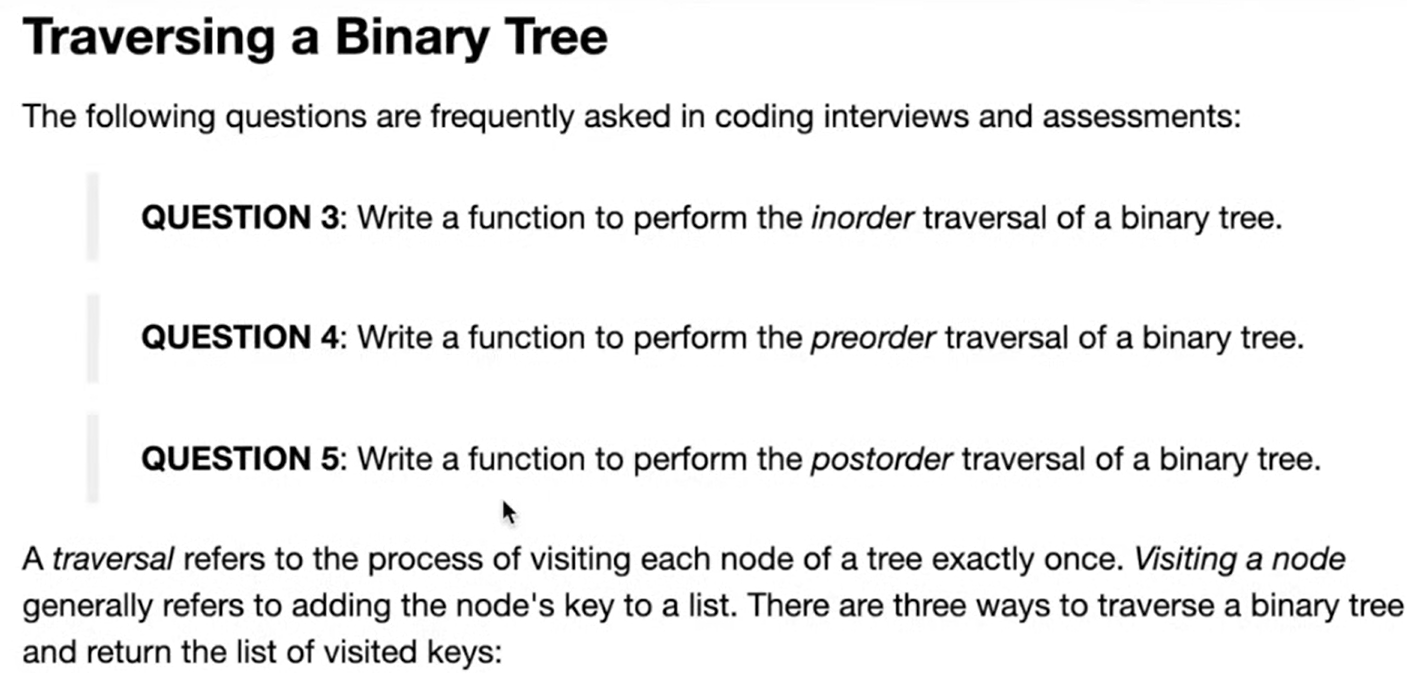

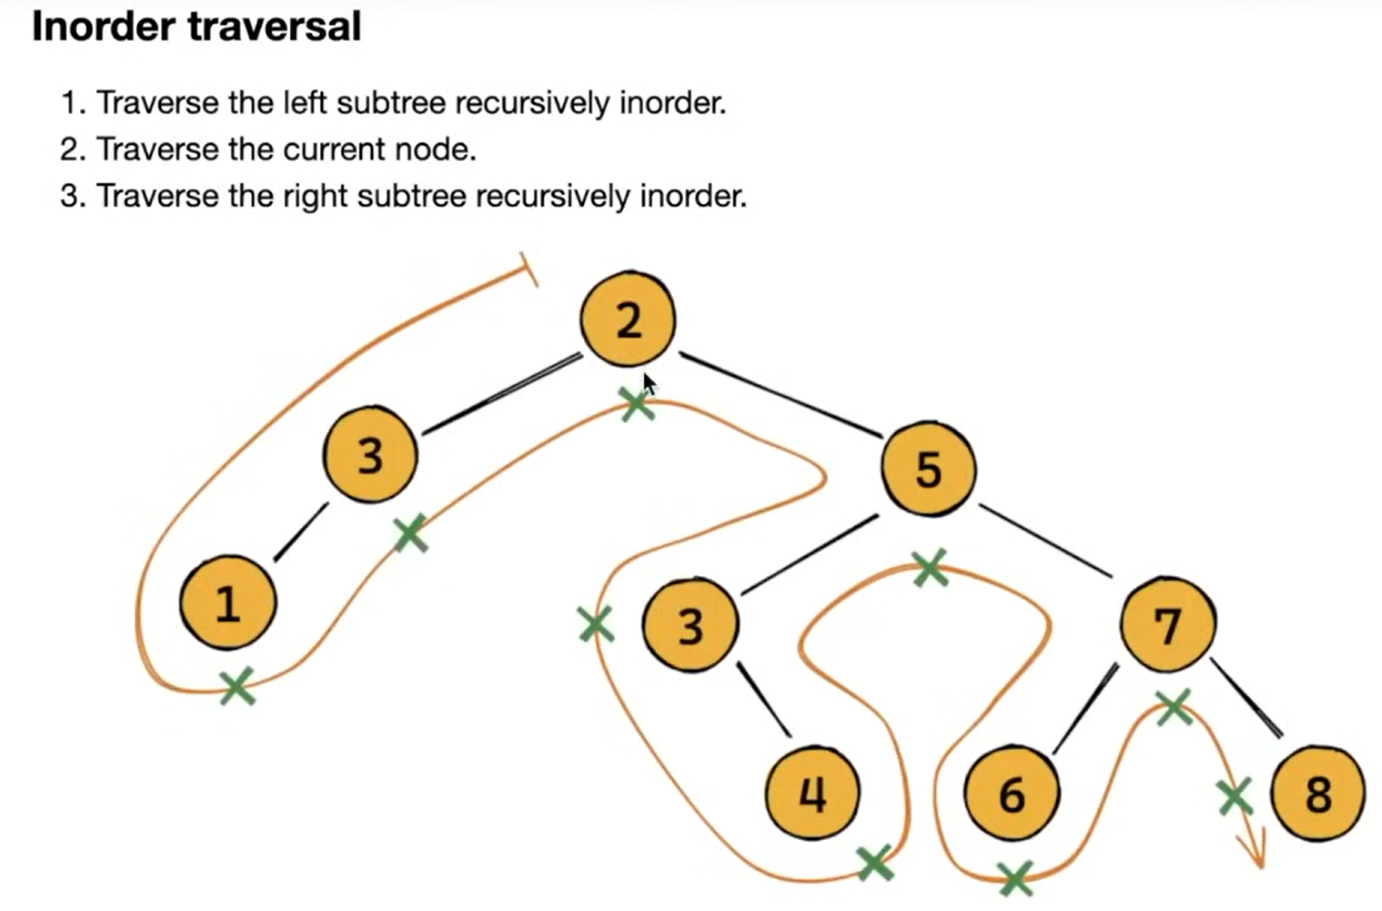

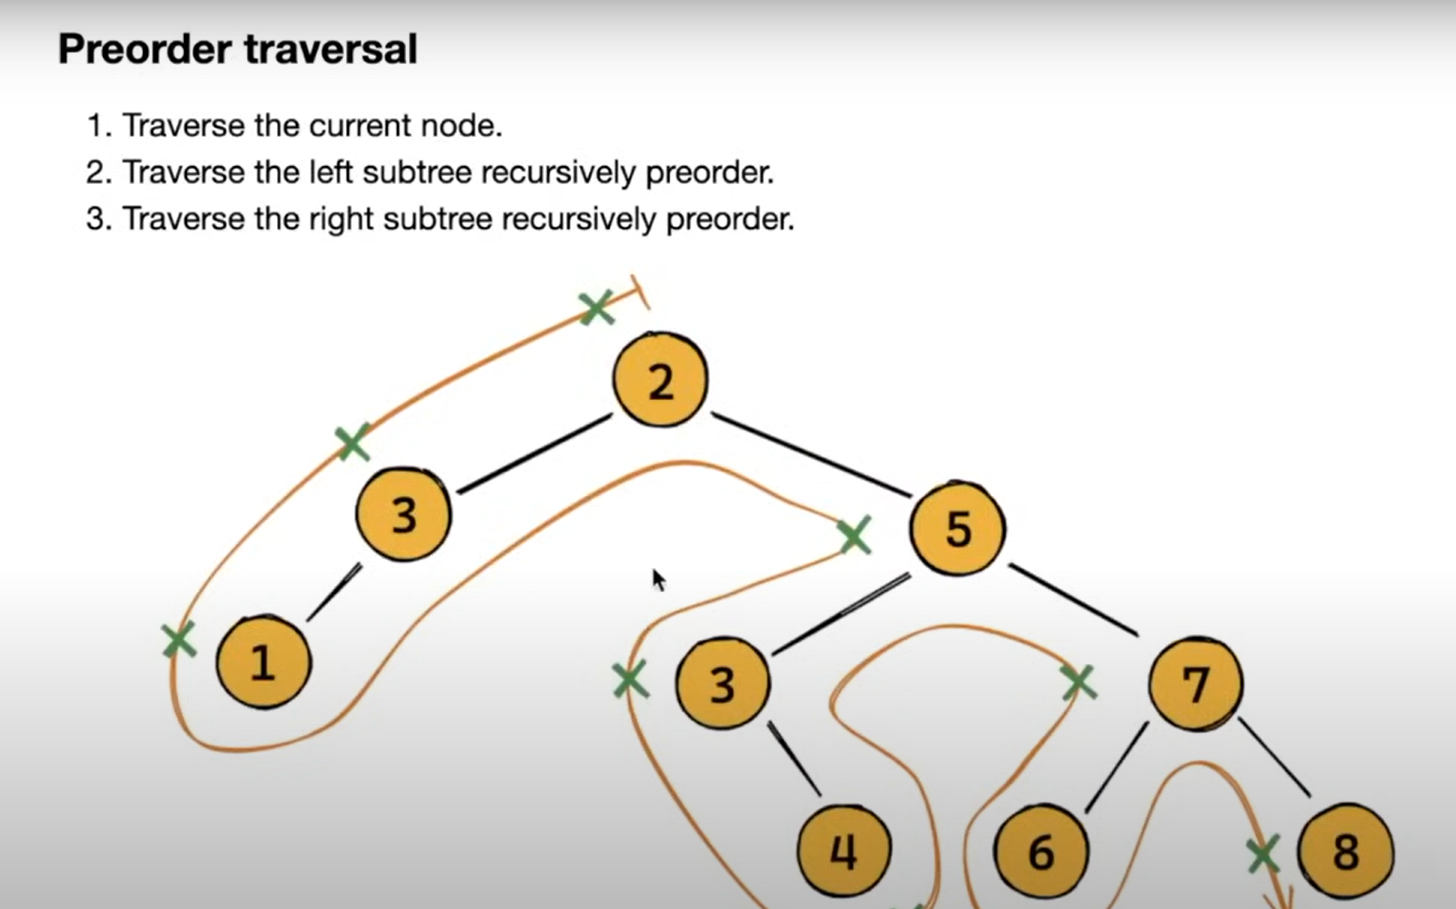

Post-order traversal is a method of traversing a tree (specifically a binary tree) where nodes are visited in the order: left subtree, right subtree, then the root node

In [12]:
def traverse_in_order(root):
    if root is None:
        return []
    
    return (
        traverse_in_order(root.left) +
        [root.data] +
        traverse_in_order(root.right)
    )
    
    

In [13]:
traverse_in_order(node)

[1, 3, 2, 3, 4, 5, 6, 7, 8]

## Binary Search Tree (BST)

A binary search tree or BST is a binary tree that satisfies the following conditions:

1. The left subtree of any node only contains nodes with keys less than the node's key
2. The right subtree of any node only contains nodes with keys greater than the node's key

It follows from the above conditions that every subtree of a binary search tree must also be a binary search tree.


> **QUESTION 8**: Write a function to check if a binary tree is a binary search tree (BST).✅

> **QUESTION 9**: Write a function to find the maximum key in a binary tree.✅

> **QUESTION 10**: Write a function to find the minimum key in a binary tree.✅


Here's a function that covers all of the above:

In [14]:
# Question 8
def isBinarySearchTree(root):
   def check(root, min_val, max_val):
      if root is None:
         return True
      
      if root.data < min_val or root.data > max_val:
         return False

      return (
         check(root.left, min_val, root.data -1) and
         check(root.right, root.data + 1, max_val)
      )
   
   return check(root =root, min_val=float('-inf'), max_val=float('inf'))


In [15]:
# Question 8
def is_bst(root):

    """
    Key of this Algorithm is maximum of Left sub tree is less than root node data and 
    minimum of right subtree is greater than root data.

    i.e ---> max(leftSubTree) < root.data and min(rightSubTree) > root.data
    """
    if root is None:
        return True, None, None
    
    is_bst_l, min_l, max_l = is_bst(root.left)
    is_bst_r, min_r, max_r = is_bst(root.right)

    is_bst_node = (is_bst_l and is_bst_r and
        (max_l is None or root.data > max_l) and
        (min_r is None or min_r > root.data))
    
    min_key = min([x for x in [min_l, root.data, min_r] if x is not None])
    max_key = max([x for x in [max_r, root.data, max_r] if x is not None])

    return is_bst_node, min_key, max_key


In [16]:
# Question 9, 10
def min_max_binary_tree(root):
    if root is None:
        return None, None
    
    left_min, left_max = min_max_binary_tree(root.left)
    right_min, right_max = min_max_binary_tree(root.right)

    min_key = min([x for x in [left_min, root.data, right_min] if x is not None])
    max_key = max([x for x in [left_max, root.data, right_max] if x is not None])

    return min_key, max_key

In [17]:
def find(root, target):
    if root is None:
        return None
    if root.data == target:
        return root
    
    if target < root.data:
        return find(root.left, target)
    return find(root.right, target)


In [18]:
from typing import List
class User:
    def __init__(self, username, name, email):
        self.username = username
        self.name = name
        self.email = email

    def __repr__(self):
        return "User(username='{}', name='{}', email='{}')".format(self.username, self.name, self.email)
    
    def __str__(self):
        return self.__repr__()

class UserDataBase:
    def __init__(self) -> None:
        self.usersDB = []
    
    def insert(self, user: User) -> None:
        i = 0
        while i < len(self.users):
            if self.usersDB[i].username > user.username:
                break
            i += 1
        self.usersDB.insert(i, user)

    def find(self, username: str) -> str:
        for user in self.usersDB:
            if user.username == username:
                return user
        return None
            
    def update(self, user: User) -> bool:
        target = self.find(user.username)
        if target is not None:
            target.name, target.email = user.name, user.email
            return True
        return False
    
    @property
    def users(self):
        return self.usersDB
    
    @users.setter
    def users(self, users_arr: List[User]):
        if isinstance(users_arr, User):
            self.usersDb = users_arr

    def __repr__(self):
        return str(self.usersDB)
    
    def __str__(self):
        return self.__repr__()

In [19]:
aakash = User('aakash', 'Aakash Rai', 'aakash@example.com')
biraj = User('biraj', 'Biraj Das', 'biraj@example.com')
hemanth = User('hemanth', 'Hemanth Jain', 'hemanth@example.com')
jadhesh = User('jadhesh', 'Jadhesh Verma', 'jadhesh@example.com')
siddhant = User('siddhant', 'Siddhant Sinha', 'siddhant@example.com')
sonaksh = User('sonaksh', 'Sonaksh Kumar', 'sonaksh@example.com')
vishal = User('vishal', 'Vishal Goel', 'vishal@example.com')

In [20]:
users = UserDataBase()
users.insert(aakash)
users.insert(biraj)
users.insert(hemanth)
users.insert(jadhesh)
users.insert(siddhant)
users.insert(sonaksh)
users.insert(vishal)

In [21]:
users

[User(username='aakash', name='Aakash Rai', email='aakash@example.com'), User(username='biraj', name='Biraj Das', email='biraj@example.com'), User(username='hemanth', name='Hemanth Jain', email='hemanth@example.com'), User(username='jadhesh', name='Jadhesh Verma', email='jadhesh@example.com'), User(username='siddhant', name='Siddhant Sinha', email='siddhant@example.com'), User(username='sonaksh', name='Sonaksh Kumar', email='sonaksh@example.com'), User(username='vishal', name='Vishal Goel', email='vishal@example.com')]

In [22]:
class BSTNode:
    def __init__(self, key, value=None):
        self.key = key
        self.value = value
        self.left = None
        self.right = None
        self.parent = None

In [23]:
def insert(root, key, value):
    if root is None:
        root = BSTNode(key, value)
    elif key < root.key:
        root.left = insert(root.left, key, value)
        root.left.parent = root
    else:
        root.right = insert(root.right, key, value)
        root.right.parent = root
    return root

In [24]:
def update(root, key, value):
    target = find(root, key)
    if target is not None:
        target.value = value

## Balanced Binary Trees

> **QUESTION 14**: Write a function to determine if a binary tree is balanced.

Here's a recursive strategy:

1. Ensure that the left subtree is balanced.
2. Ensure that the right subtree is balanced.
3. Ensure that the difference between heights of left subtree and right subtree is not more than 1.


In [25]:
def is_balanced(root):
    if node is None:
        return 0, True
    is_balanced_l, height_l = is_balanced(root.left)
    is_balanced_r, height_r = is_balanced(root.right)

    return is_balanced_l and is_balanced_r and abs(height_l - height_r) <= 1, 1 + max(height_l, height_r)

## Balanced Binary Search Trees

> **QUESTION 15**: Write a function to create a balanced BST from a sorted list/array of key-value pairs.

We can use a recursive strategy here, turning the middle element of the list into the root, and recursively creating left and right subtrees.

In [26]:
def make_balance_bst(data, lo=0, hi=None, parent=None):
    if hi is None:
        hi = len(data) -1
    if lo > hi:
        return None
    
    mid = (lo + hi) // 2
    key, value = data[mid]

    root = BSTNode(key, value)
    root.parent = parent
    root.left = make_balance_bst(data, lo, mid -1, root)
    root.right = make_balance_bst(data, mid + 1, hi, root)

    return root


In [27]:
users = [(user.username, user) for user in users.users]

In [28]:
users

[('aakash',
  User(username='aakash', name='Aakash Rai', email='aakash@example.com')),
 ('biraj',
  User(username='biraj', name='Biraj Das', email='biraj@example.com')),
 ('hemanth',
  User(username='hemanth', name='Hemanth Jain', email='hemanth@example.com')),
 ('jadhesh',
  User(username='jadhesh', name='Jadhesh Verma', email='jadhesh@example.com')),
 ('siddhant',
  User(username='siddhant', name='Siddhant Sinha', email='siddhant@example.com')),
 ('sonaksh',
  User(username='sonaksh', name='Sonaksh Kumar', email='sonaksh@example.com')),
 ('vishal',
  User(username='vishal', name='Vishal Goel', email='vishal@example.com'))]

In [29]:
root = make_balance_bst(users, 0)

t = ((1, 3, None), 2, ((None, 3, 4), 5, (6, 7, 8)))

In [30]:
balance_tree = (((3 , 4, 5), 6, (7 ,8, 9)), 10, ((None, 15, 17), 20, (27, 35, None)))

In [31]:
root = parse_tuple(balance_tree)

In [32]:
root.left.data

6

In [33]:
isBinarySearchTree(root)

True

In [34]:
is_bst(root)

(True, 3, 35)

In [35]:
min_max_binary_tree(root)

(3, 35)

In [36]:
root

In [37]:
from modules.Trees.TreeMap import TreeMap

In [38]:
users

[('aakash',
  User(username='aakash', name='Aakash Rai', email='aakash@example.com')),
 ('biraj',
  User(username='biraj', name='Biraj Das', email='biraj@example.com')),
 ('hemanth',
  User(username='hemanth', name='Hemanth Jain', email='hemanth@example.com')),
 ('jadhesh',
  User(username='jadhesh', name='Jadhesh Verma', email='jadhesh@example.com')),
 ('siddhant',
  User(username='siddhant', name='Siddhant Sinha', email='siddhant@example.com')),
 ('sonaksh',
  User(username='sonaksh', name='Sonaksh Kumar', email='sonaksh@example.com')),
 ('vishal',
  User(username='vishal', name='Vishal Goel', email='vishal@example.com'))]

In [39]:
root = TreeMap.create_balance_binary_tree(users)

In [40]:
display_trees(root)

      ↗aakash
   ↗biraj
      ↘hemanth
jadhesh
      ↗siddhant
   ↘sonaksh
      ↘vishal


In [41]:
"jadesh" < "Sourabh Suman"

False

In [42]:
b = TreeMap()

In [43]:
from modules.Trees.Node import BSTNode

In [44]:
print(isinstance(root, BSTNode))
b.root = root

True


In [45]:
abc = root.left
print(abc)
print(abc.parent)

BSTNode(Key=biraj, value=User(username='biraj', name='Biraj Das', email='biraj@example.com')
BSTNode(Key=jadhesh, value=User(username='jadhesh', name='Jadhesh Verma', email='jadhesh@example.com')


In [46]:
b.dp()

      ↗aakash
   ↗biraj
      ↘hemanth
jadhesh
      ↗siddhant
   ↘sonaksh
      ↘vishal


In [47]:
b["vishal"]

User(username='vishal', name='Vishal Goel', email='vishal@example.com')

In [48]:
b.setItem("Sourabh Suman", User("sourabh748","sourabh suman", "sos.sourabh.7687@gmail.com"))
b.updateItem("Sourabh Suman", User("sourabh748","sourabh suman", "souravsuman7631@gmail.com"))

True

In [49]:
b.dp()

         ↗Sourabh Suman
      ↗aakash
   ↗biraj
      ↘hemanth
jadhesh
      ↗siddhant
   ↘sonaksh
      ↘vishal


In [50]:
%%time
b["Sourabh Suman"]

CPU times: total: 0 ns
Wall time: 0 ns


User(username='sourabh748', name='sourabh suman', email='souravsuman7631@gmail.com')

In [75]:
b.dp()

In [ ]:
b.findItem("aakash")

User(username='aakash', name='Aakash Rai', email='aakash@example.com')

In [74]:
del b["sonaksh"]

In [54]:
root = b._TreeMap__root

In [55]:
def findSuccessor(root, key):
        
    if root is None:
        return None
    
    successor = None
    curr = root
    while curr is not None:
        if curr.key > key:
            print("left")
            successor = curr
            curr = curr.left
            continue
        
        if key >= curr.key:
            print("right")
            curr = curr.right
        
    return successor

In [56]:
a = root.left
print(a.parent)

BSTNode(Key=biraj, value=User(username='biraj', name='Biraj Das', email='biraj@example.com')
